In [86]:
#importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')





In [87]:
#function to read csv or excel file
def read_file(file_name):
    try:
        if file_name.endswith('.csv'):
            return pd.read_csv(file_name)
        elif file_name.endswith('.xlsx'):
            return pd.read_excel(file_name)
        else:
            print('File format not supported')
            return None
    except:
        print('File not found')
        return None

In [88]:
#Function to check total missing data 
def nun_missing_values(df):
    total_missing = df.isnull().sum()
    total_missing = total_missing[total_missing > 0]
    total_missing.sort_values(inplace=True)
    return total_missing

In [89]:
#function to return the dataframe with the nun columns dropped
def drop_columns_50_percent_missing(df):
    nun_columns = df.isnull().sum()
    nun_columns = nun_columns[nun_columns > len(df) * 0.5]
    nun_columns.sort_values(inplace=True)
    df.drop(nun_columns.index, axis=1, inplace=True)
    print('\nDropped columns with more than 50% missing values: {}'.format(nun_columns.sum()))
    return df

In [90]:
# function to correct Date datatype
def bool_to_datetime(df):
    try:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
        elif 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        return df
    except:
        print('Date column not found')
        return None

In [91]:
#function to extract year from the date column
def extract_year(df):
    try:
        if 'Date' in df.columns:
            df['year'] = df['Date'].dt.year
        elif 'date' in df.columns:
            df['year'] = df['date'].dt.year
        return df['year']
    except:
        print('Date column not found')
        return None

In [92]:
#function to extract month from the date column
def extract_month(df):
    try:
        if 'Date' in df.columns:
            df['month'] = df['Date'].dt.month
        elif 'date' in df.columns:
            df['month'] = df['date'].dt.month
        return df['month']
    except:
        print('Date column not found')
        return None

In [93]:
#spliting year into quarters by month and adding quarter column
def split_month_into_quarters(df):
    try:
        df['quarter'] = df['month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))
        return df['quarter']
    except:
        print('month column not found')
        return None

In [94]:
#function for extracting the numerical features
def numeric_features(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_features

In [95]:
#function for extracting the categorical features
def categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns
    return categorical_features

In [96]:
#function for dropping id column
def drop_id(df):
    try:
        if 'id' in df.columns:
            df.drop('id', axis=1, inplace=True)
        elif 'ID' in df.columns:
            df.drop('ID', axis=1, inplace=True)
        return df
    except:
        print('ID column not found')
        return None

In [97]:
#function to get information about the data
def df_info(df):
    print('Dataframe info:')
    print(df.info())
    print('\n')
    print('Dataframe describe:')
    print(df.describe())

In [98]:
#automatic exploratory data analysis for each dataframe
def auto_explore(df):
    '''
    This function will automatically explore the dataframe
    '''
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(df)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=df.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=df.median(), color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=df.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(df, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Distribution of ' + df.name)

    # Show the figure
    fig.show()

In [99]:
import zipfile
zip_file = zipfile.ZipFile('retail-data-analytics.zip', 'r')
zip_file.namelist()

['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']

In [100]:
features = '/content/Features data set.csv'
sales = '/content/sales data-set.csv'
stores = '/content/stores data-set.csv'
df_features = read_file(features)
df_sales = read_file(sales)
df_stores = read_file(stores)

In [101]:
df_info(df_features)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


Dataframe describe:
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000 

In [102]:
df_info(df_sales)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


Dataframe describe:
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


In [103]:
df_info(df_stores)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


Dataframe describe:
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [104]:
#converting the date column to datetime
bool_to_datetime(df_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [105]:
#converting the date column to datetime
bool_to_datetime(df_sales)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [106]:
#converting the date column to datetime
bool_to_datetime(df_stores)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [107]:
print(df_features.shape)
print(df_sales.shape)
print(df_stores.shape)

print(df_sales[0:1].Date, df_sales[-1:].Date)

print(df_features[0:1].Date, df_features[-1:].Date)

(8190, 12)
(421570, 5)
(45, 3)
0   2010-05-02
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


**Merge the data in a unique DataFrame**

In [108]:
df=pd.merge(df_sales,df_features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,df_stores, on=['Store'], how='left')

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [109]:
#extracting year from the date column and adding it to the dataframe
df['year'] = extract_year(df)
df['year'] = df.year.astype('category')

In [110]:
#extracting month from the date column and adding it to the dataframe
df['month'] = extract_month(df)
df['month'] = df.month.astype('category')

In [111]:
#adding quarter column to the dataframe
df['quarter'] = split_month_into_quarters(df)
df['quarter'] = df.quarter.astype('category')

In [112]:
df = drop_id(df)

In [113]:
df.year.unique()

[2010, 2011, 2012]
Categories (3, int64): [2010, 2011, 2012]

In [114]:
#extracting year_df from df
def year_df(df, year):
    return df[df['year'] == year]
    
#extracting month_df from df

def month_df(df, month):
    return df[df['month'] == month]

In [115]:
#creating a daframe for each year
year_dfs = []
for year in df.year.unique().tolist():
    globals() [f"df_{year}"] = year_df(df, year)
    year_dfs.append([f"df_{year}"])
    
    #create folder if it doesn't exist
    if not os.path.exists(f"data/processed/"):
        os.makedirs(f"data/processed/")
        
    #save each dataframe as a csv file
    globals()[f"df_{year}"].to_csv(f"data/processed/{year}.csv")
    print(f"df_{year} created and saved as {year}.csv")
print(year_dfs)

df_2010 created and saved as 2010.csv
df_2011 created and saved as 2011.csv
df_2012 created and saved as 2012.csv
[['df_2010'], ['df_2011'], ['df_2012']]


In [116]:
df_2010.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,quarter
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2010,5,2
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2010,12,4
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2010,2,1
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2010,2,1
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,2010,5,2


In [117]:
#reading csv files in processed folder
path = '/content/data/processed'
year_dfs = {}
for file in os.listdir(path):
    if file.endswith('.csv'):
        print(file)
        globals() [f"df_{file}"] = pd.read_csv(path+file)
        year_dfs[f"df_{file}"] = globals() [f"df_{file}"]
        print("df_"+file+" created")
        temp = pd.read_csv(path+file)
        df_info(temp)
        

2012.csv


FileNotFoundError: ignored

In [118]:
for file in os.listdir(path):
    if file.endswith('.csv'):
        temp = pd.read_csv(path+file)
        categorical_features = temp.select_dtypes(include=['object', 'bool', 'category']).columns
        numeric_features = temp.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_features:
            print('numeric density of {}:'.format(file))
            show_density(temp[col])

FileNotFoundError: ignored

In [119]:
for file in os.listdir(path):
    if file.endswith('.csv'):
        temp = pd.read_csv(path+file)
        categorical_features = temp.select_dtypes(include=['object', 'bool', 'category']).columns
        numeric_features = temp.select_dtypes(include=['int64', 'float64']).columns
        print('categorical distribution of {}:'.format(file))
        for feature in categorical_features:
            print('\n')
            print('Statistical analysis of {}:'.format(feature))
            print(temp[feature].value_counts())
            print('\n')
            print('Descriptive statistics of {}:'.format(feature))
            print(temp[feature].describe())
            print('\n')
            print('Histogram of {}:'.format(feature))
            sns.countplot(x=feature, data=temp)
            plt.xticks(rotation=90)
            plt.show()

FileNotFoundError: ignored

In [121]:
#Export Pandas DataFrame to CSV
df.to_csv('data.csv', index=False,encoding='utf-8')

Check data and features

In [122]:
print('training_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

training_data duplicated:0


In [123]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [124]:
df_info(df)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  S

In [125]:
nun_missing_values(df)

Series([], dtype: int64)

In [126]:
#dropping columns with more than 40% missing values
drop_columns_50_percent_missing(df)


Dropped columns with more than 50% missing values: 0


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,quarter
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,151315,2010,5,2
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,151315,2010,12,4
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315,2010,2,1
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315,2010,2,1
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,151315,2010,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221,2012,9,3
421566,45,98,2012-05-10,628.10,False,18.272222,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221,2012,5,2
421567,45,98,2012-12-10,1061.02,False,12.483333,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221,2012,12,4
421568,45,98,2012-10-19,760.01,False,13.594444,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221,2012,10,4


In [127]:
#getting the numeric features
numeric_features = numeric_features(df)

#getting the categorical features
categorical_features = categorical_features(df)

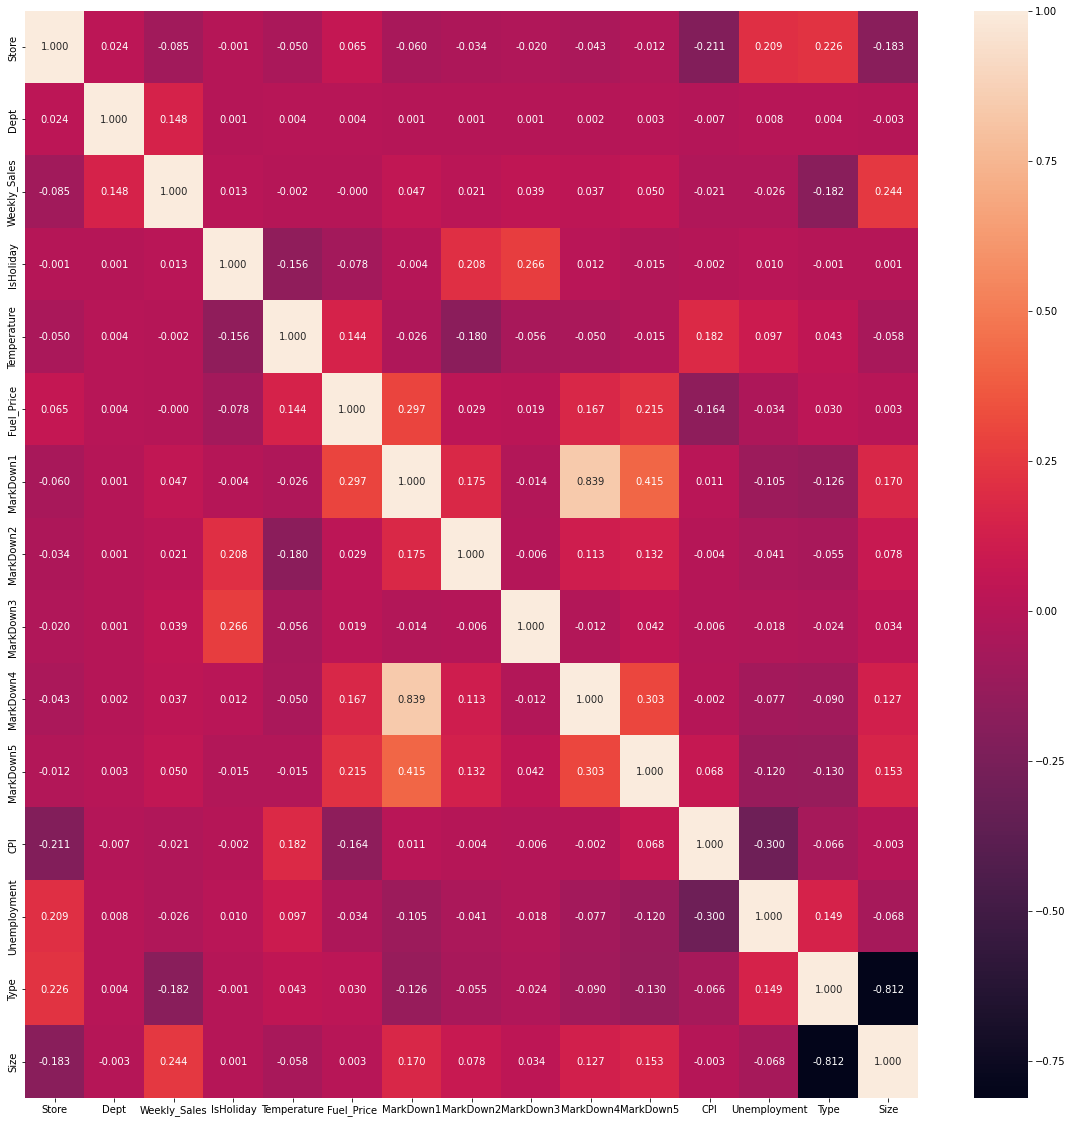

In [128]:
#dataframe correlation
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.heatmap(corr, annot=True)

In [129]:

#getting distribution of numeric features
for col_name in numeric_features:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Store:
 - Range: 44.00
 - Variance: 163.46
 - Std.Dev: 12.79

Dept:
 - Range: 98.00
 - Variance: 929.77
 - Std.Dev: 30.49

Weekly_Sales:
 - Range: 698088.30
 - Variance: 515797856.84
 - Std.Dev: 22711.18

Temperature:
 - Range: 56.78
 - Variance: 105.04
 - Std.Dev: 10.25

Fuel_Price:
 - Range: 2.00
 - Variance: 0.21
 - Std.Dev: 0.46

MarkDown1:
 - Range: 88646.76
 - Variance: 36631375.49
 - Std.Dev: 6052.39

MarkDown2:
 - Range: 104785.30
 - Variance: 25852534.81
 - Std.Dev: 5084.54

MarkDown3:
 - Range: 141659.71
 - Variance: 30568441.65
 - Std.Dev: 5528.87

MarkDown4:
 - Range: 67474.85
 - Variance: 15167363.50
 - Std.Dev: 3894.53

MarkDown5:
 - Range: 108519.28
 - Variance: 17704144.50
 - Std.Dev: 4207.63

CPI:
 - Range: 101.17
 - Variance: 1533.45
 - Std.Dev: 39.16

Unemployment:
 - Range: 10.43
 - Variance: 3.47
 - Std.Dev: 1.86

Type:
 - Range: 2.00
 - Variance: 0.44
 - Std.Dev: 0.67

Size:
 - Range: 184747.00
 - Variance: 3718631543.04
 - Std.Dev: 60980.58


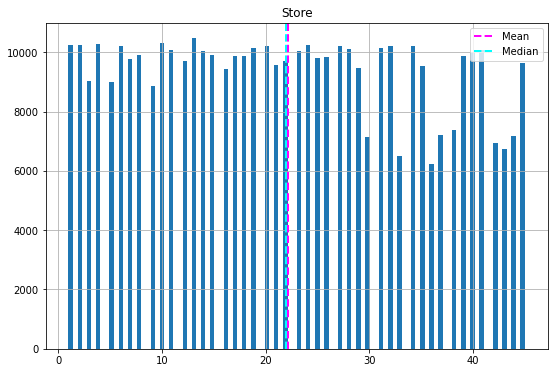

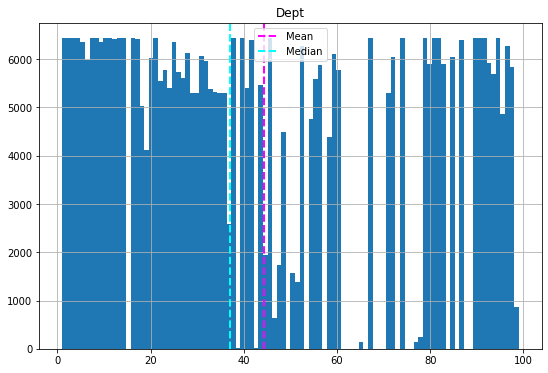

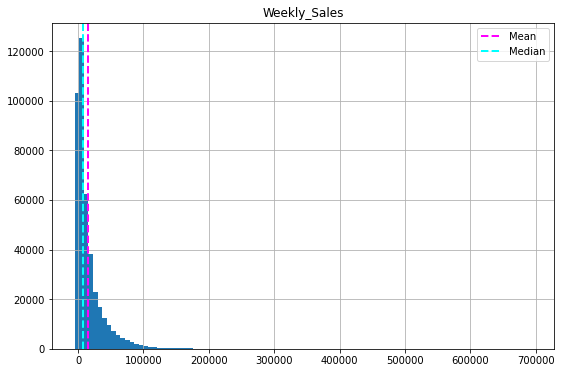

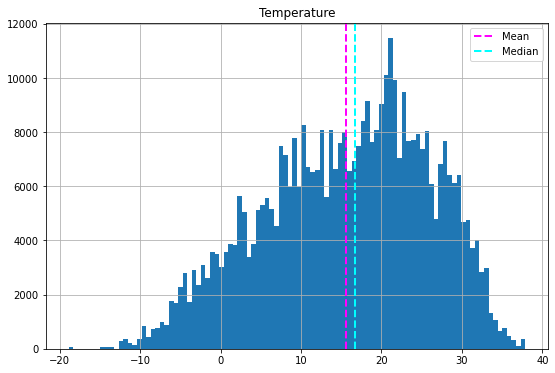

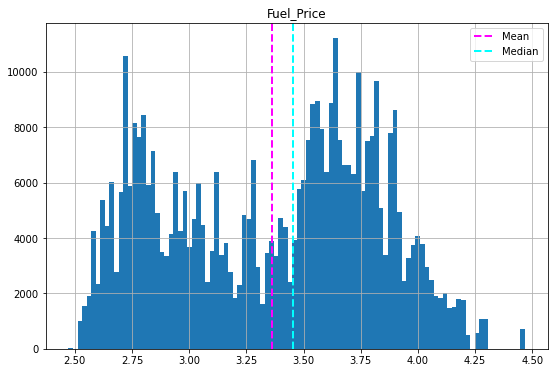

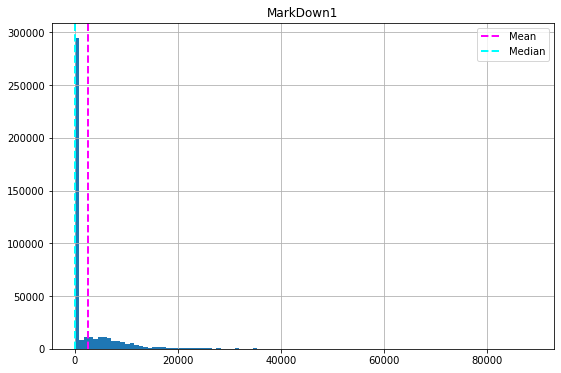

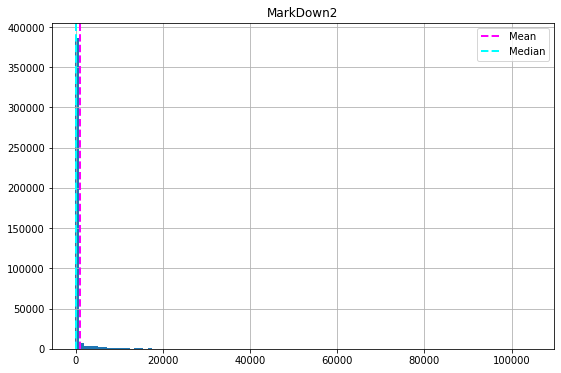

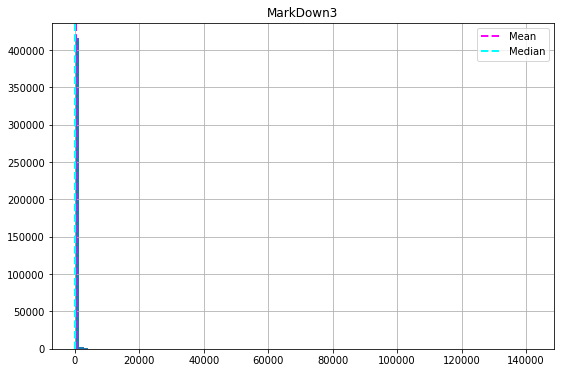

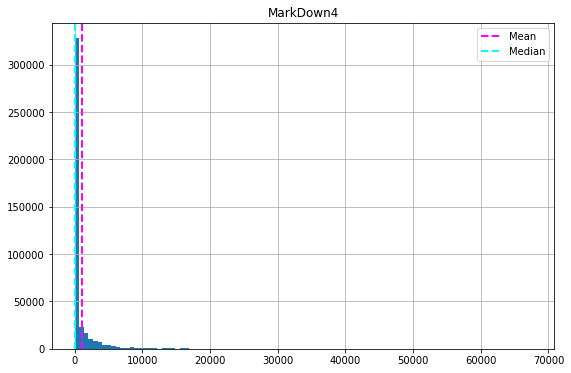

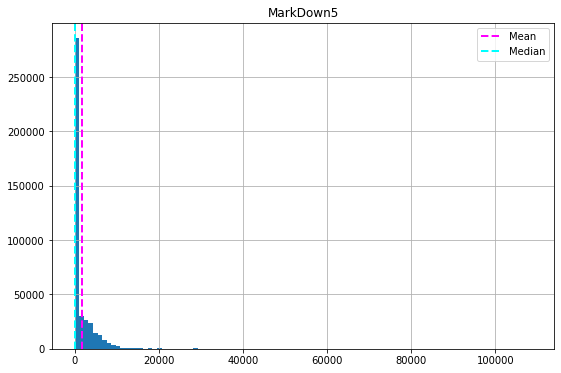

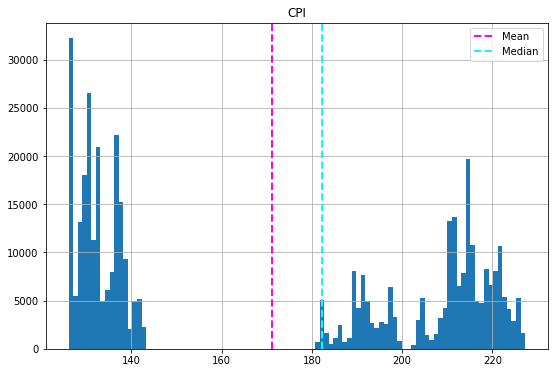

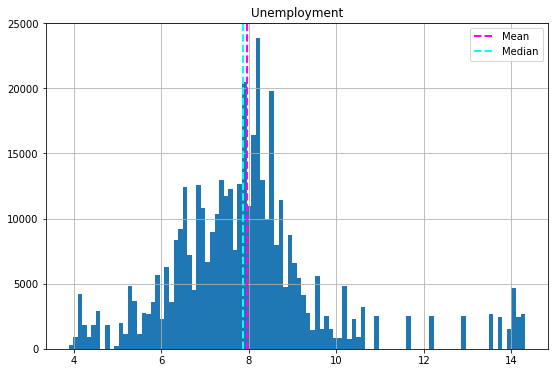

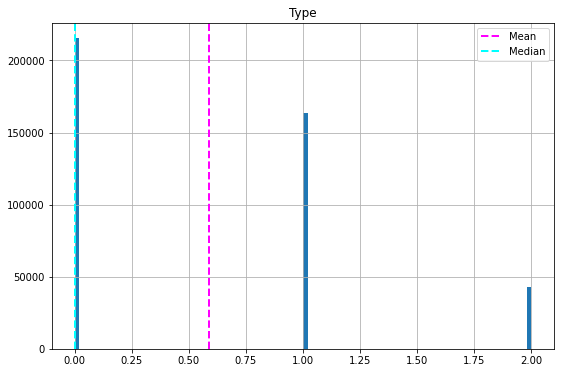

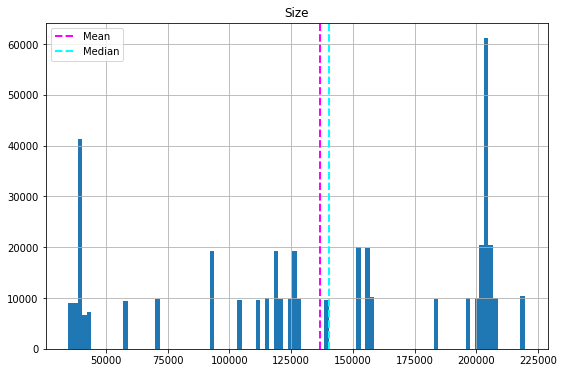

In [130]:
#getting distribution of numeric features with plots

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    plt.legend()
plt.show()



Statistical analysis of IsHoliday:
False    391909
True      29661
Name: IsHoliday, dtype: int64


Descriptive statistics of IsHoliday:
count     421570
unique         2
top        False
freq      391909
Name: IsHoliday, dtype: object


Histogram of IsHoliday:


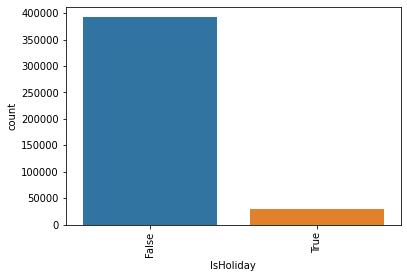



Statistical analysis of year:
2011    153453
2010    140679
2012    127438
Name: year, dtype: int64


Descriptive statistics of year:
count     421570
unique         3
top         2011
freq      153453
Name: year, dtype: int64


Histogram of year:


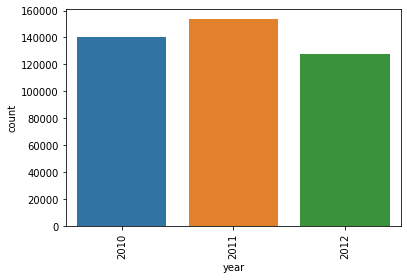



Statistical analysis of month:
4     41266
9     38399
10    38334
5     38214
7     38123
3     35408
6     35368
8     35238
12    32661
2     32572
1     29402
11    26585
Name: month, dtype: int64


Descriptive statistics of month:
count     421570
unique        12
top            4
freq       41266
Name: month, dtype: int64


Histogram of month:


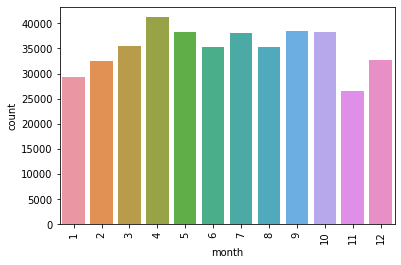



Statistical analysis of quarter:
2    114848
3    111760
4     97580
1     97382
Name: quarter, dtype: int64


Descriptive statistics of quarter:
count     421570
unique         4
top            2
freq      114848
Name: quarter, dtype: int64


Histogram of quarter:


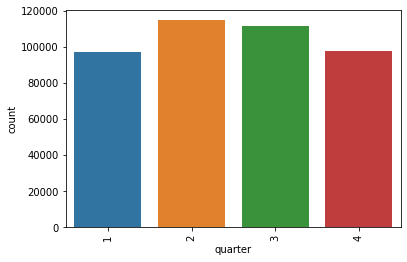

In [131]:
#statistical analysis of categorical features
for feature in categorical_features:
    print('\n')
    print('Statistical analysis of {}:'.format(feature))
    print(df[feature].value_counts())
    print('\n')
    print('Descriptive statistics of {}:'.format(feature))
    print(df[feature].describe())
    print('\n')
    print('Histogram of {}:'.format(feature))
    sns.countplot(x=feature, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [132]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(var_data.name + ' Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

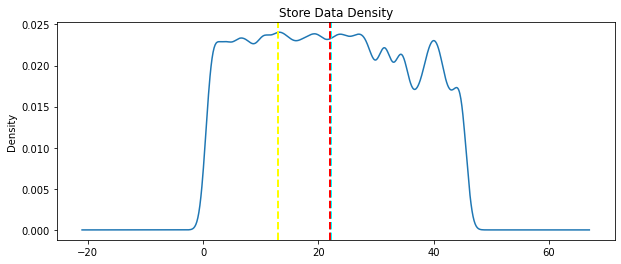

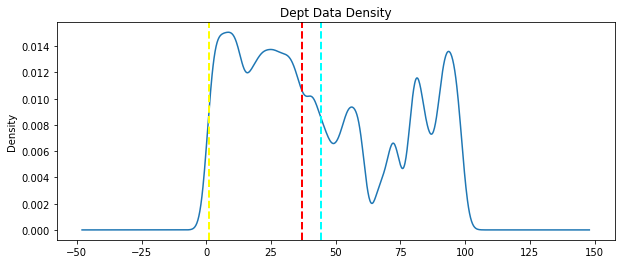

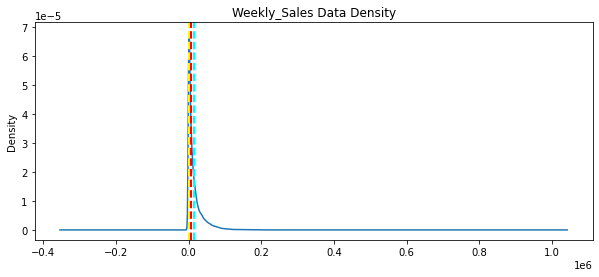

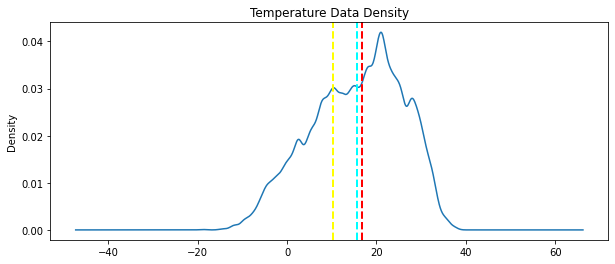

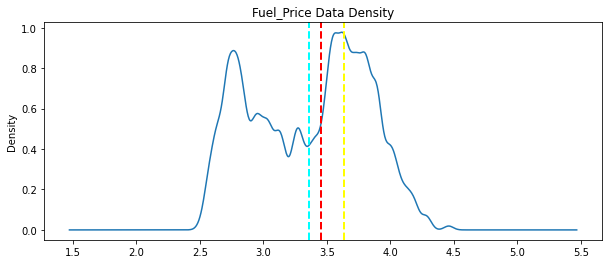

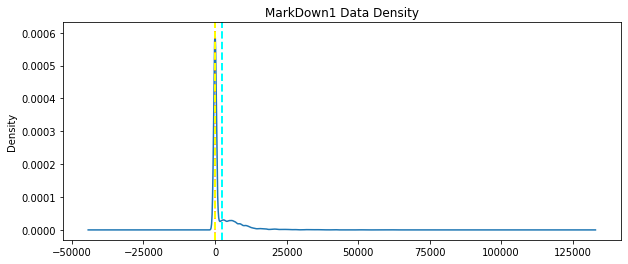

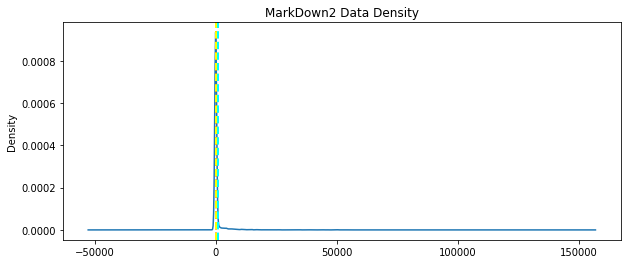

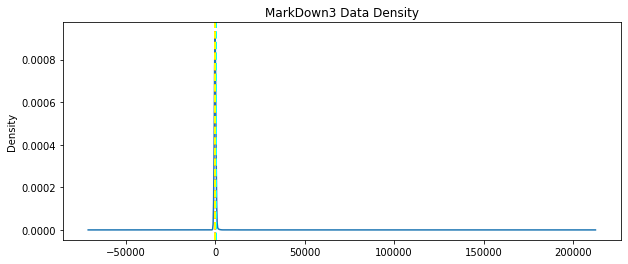

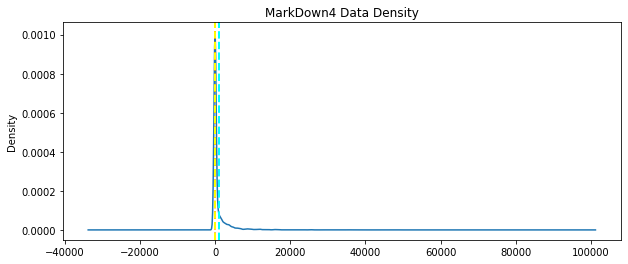

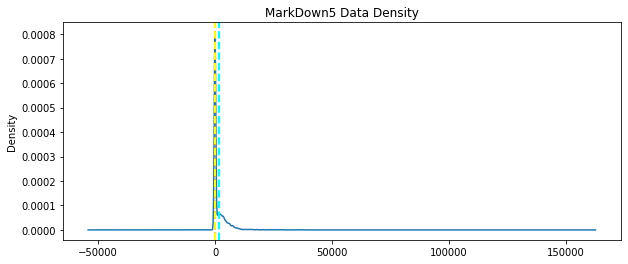

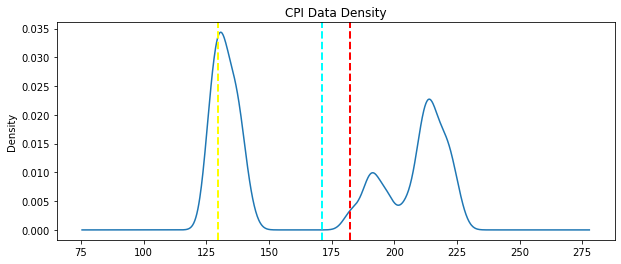

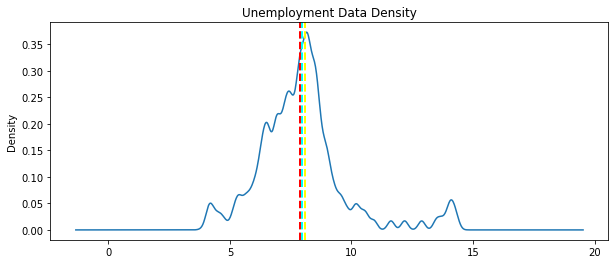

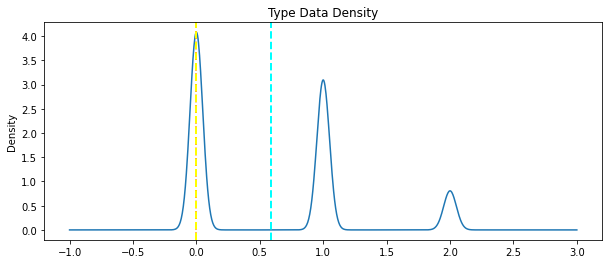

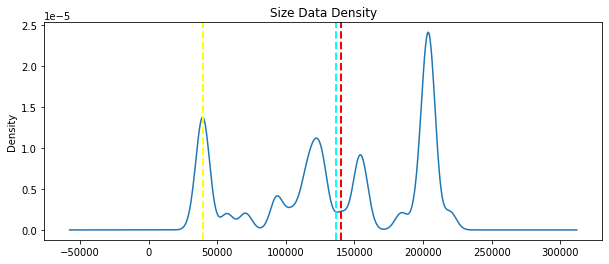

In [133]:
# Get the density of numeric features
for col in numeric_features:
    show_density(df[col])

In [134]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name +'\n'+'Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Distribution of ' + var_data.name)

    # Show the figure
    fig.show()

Store
Minimum:1.00
Mean:22.20
Median:22.00
Mode:13.00
Maximum:45.00

Dept
Minimum:1.00
Mean:44.26
Median:37.00
Mode:1.00
Maximum:99.00

Weekly_Sales
Minimum:-4988.94
Mean:15981.26
Median:7612.03
Mode:10.00
Maximum:693099.36

Temperature
Minimum:-18.92
Mean:15.61
Median:16.72
Mode:10.24
Maximum:37.86

Fuel_Price
Minimum:2.47
Mean:3.36
Median:3.45
Mode:3.64
Maximum:4.47

MarkDown1
Minimum:0.00
Mean:2590.07
Median:0.00
Mode:0.00
Maximum:88646.76

MarkDown2
Minimum:-265.76
Mean:879.97
Median:0.00
Mode:0.00
Maximum:104519.54

MarkDown3
Minimum:-29.10
Mean:468.09
Median:0.00
Mode:0.00
Maximum:141630.61

MarkDown4
Minimum:0.00
Mean:1083.13
Median:0.00
Mode:0.00
Maximum:67474.85

MarkDown5
Minimum:0.00
Mean:1662.77
Median:0.00
Mode:0.00
Maximum:108519.28

CPI
Minimum:126.06
Mean:171.20
Median:182.32
Mode:129.86
Maximum:227.23

Unemployment
Minimum:3.88
Mean:7.96
Median:7.87
Mode:8.10
Maximum:14.31

Type
Minimum:0.00
Mean:0.59
Median:0.00
Mode:0.00
Maximum:2.00

Size
Minimum:34875.00
Mean:13672

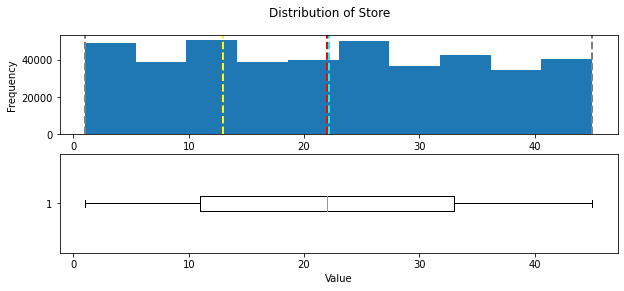

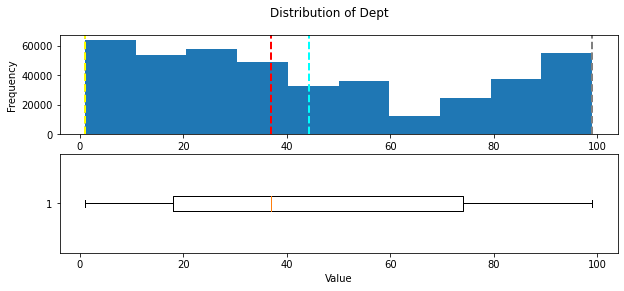

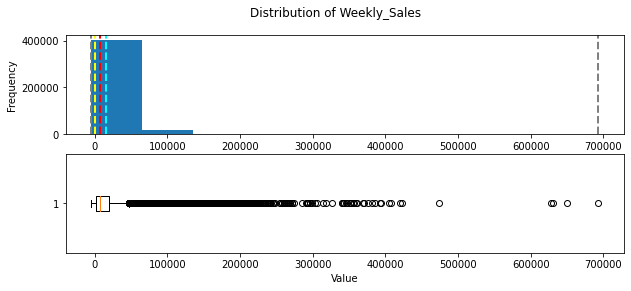

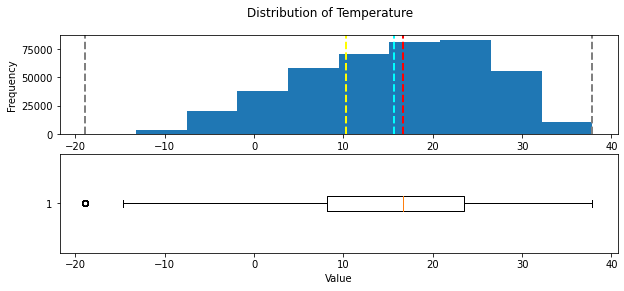

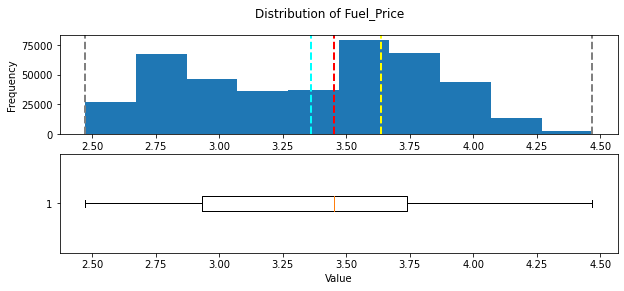

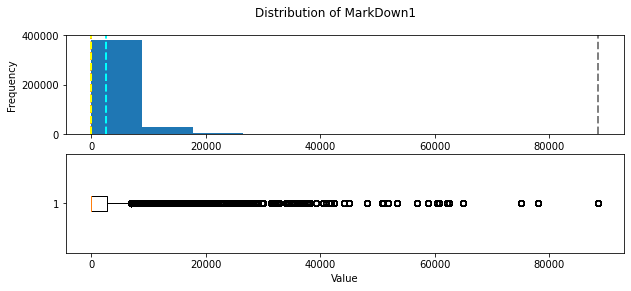

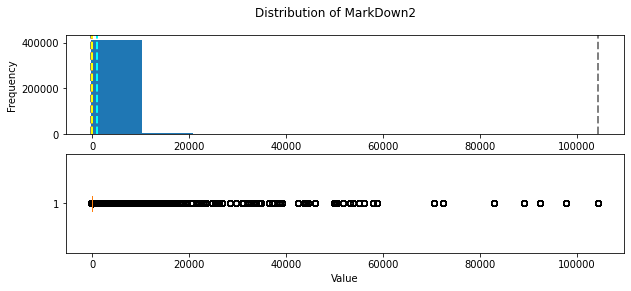

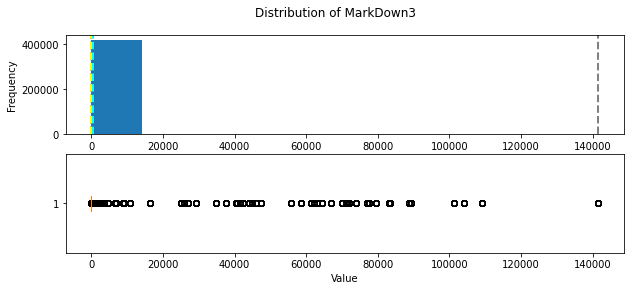

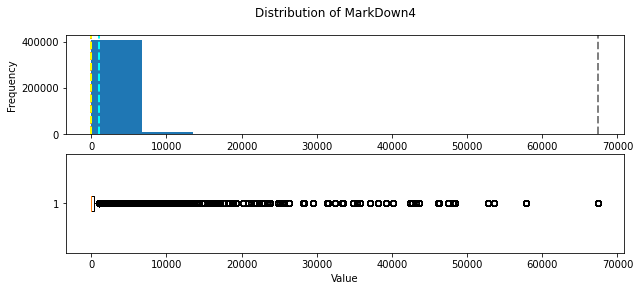

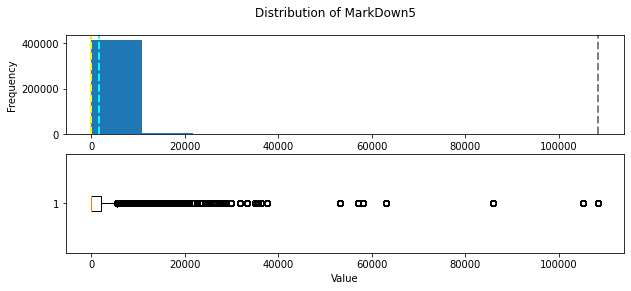

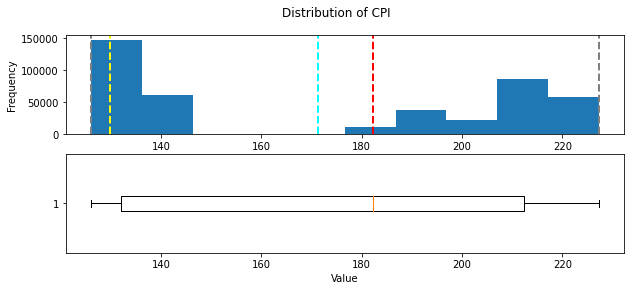

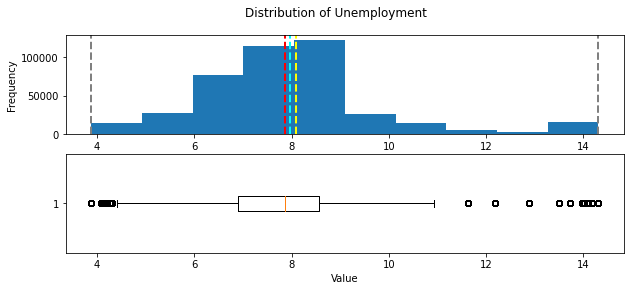

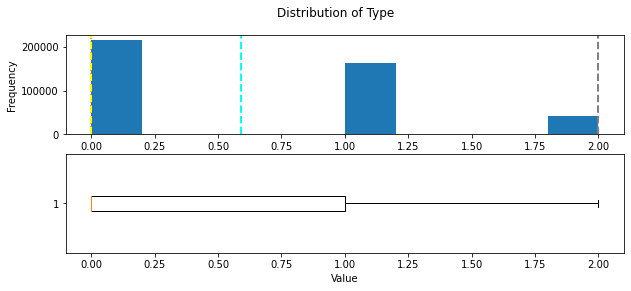

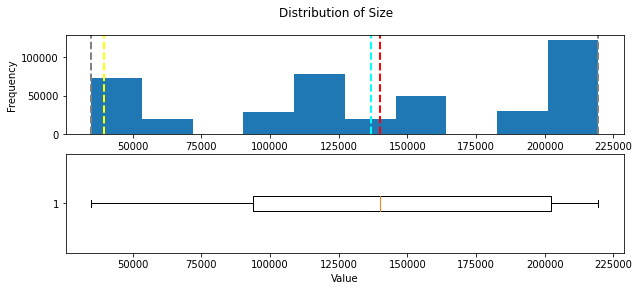

In [135]:
for col in numeric_features:
    show_distribution(df[col])

In [136]:
#bivariate data exploration
def plot_bivariate (arr_1, arr_2, df, kind):
    '''
    This function will plot a bivariate graph and display it
    arr_1: first array
    arr_2: second array
    df: dataframe
    kind: kind of plot
    '''
    for col_1 in arr_1:
        for col_2 in arr_2:
            plt.figure(figsize=(20,5))
            sns.catplot(x=col_1, y=col_2, data=df, kind=kind)
            plt.xticks(rotation=90)
            plt.show();

<Figure size 1440x360 with 0 Axes>

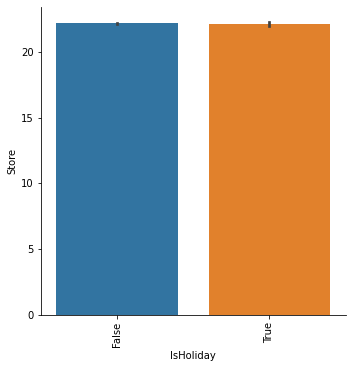

<Figure size 1440x360 with 0 Axes>

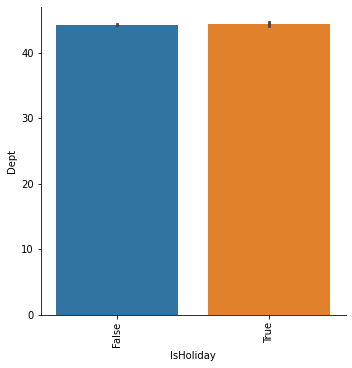

<Figure size 1440x360 with 0 Axes>

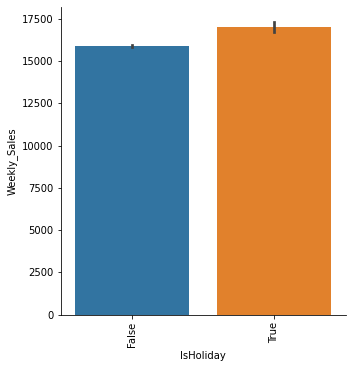

<Figure size 1440x360 with 0 Axes>

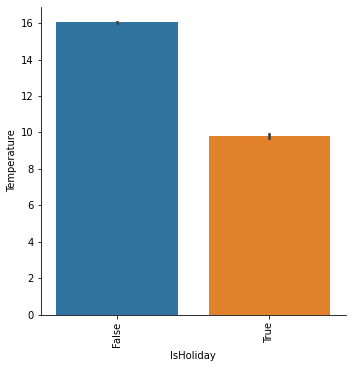

<Figure size 1440x360 with 0 Axes>

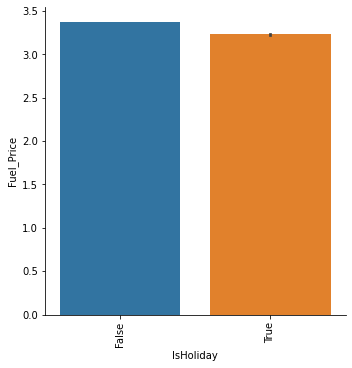

<Figure size 1440x360 with 0 Axes>

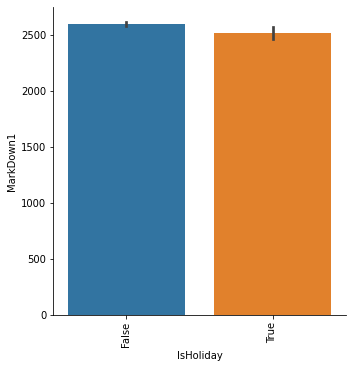

<Figure size 1440x360 with 0 Axes>

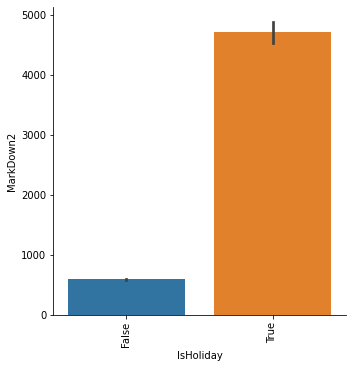

<Figure size 1440x360 with 0 Axes>

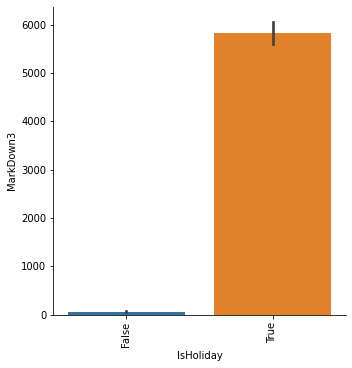

<Figure size 1440x360 with 0 Axes>

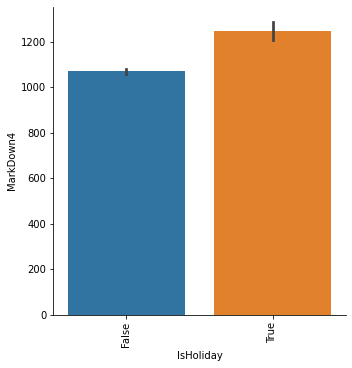

<Figure size 1440x360 with 0 Axes>

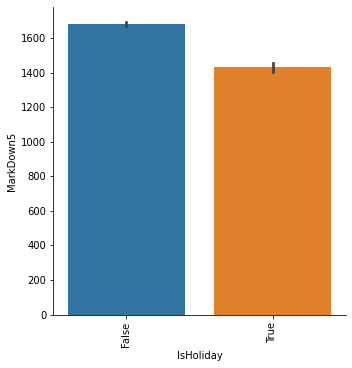

<Figure size 1440x360 with 0 Axes>

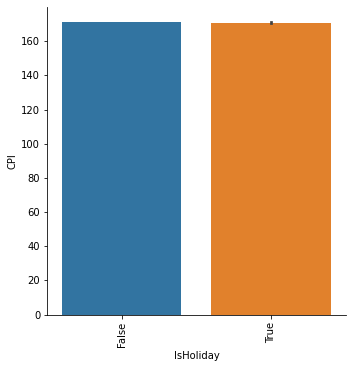

<Figure size 1440x360 with 0 Axes>

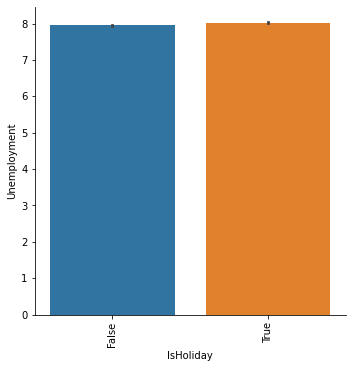

<Figure size 1440x360 with 0 Axes>

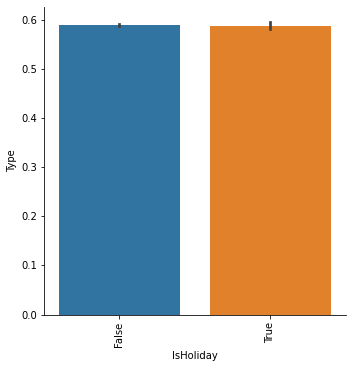

<Figure size 1440x360 with 0 Axes>

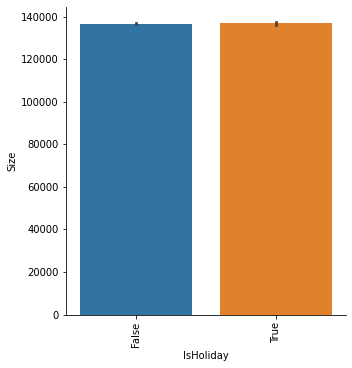

<Figure size 1440x360 with 0 Axes>

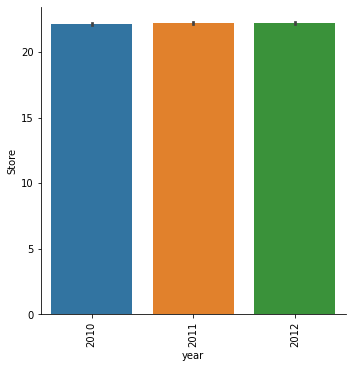

<Figure size 1440x360 with 0 Axes>

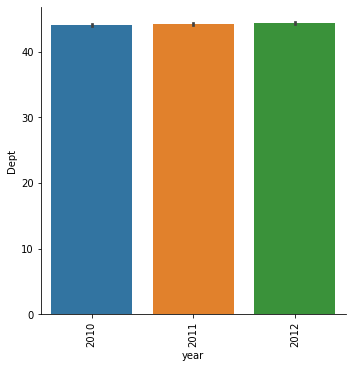

<Figure size 1440x360 with 0 Axes>

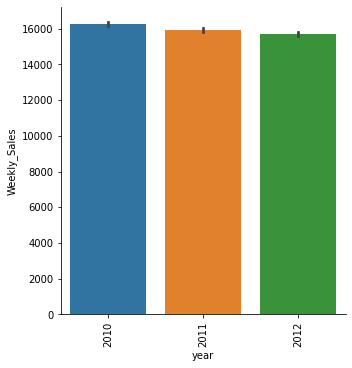

<Figure size 1440x360 with 0 Axes>

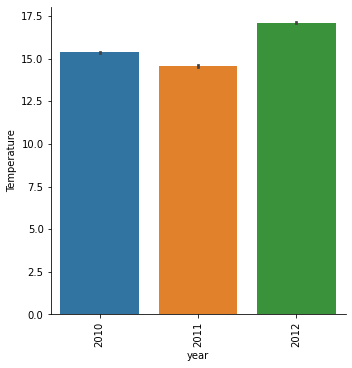

<Figure size 1440x360 with 0 Axes>

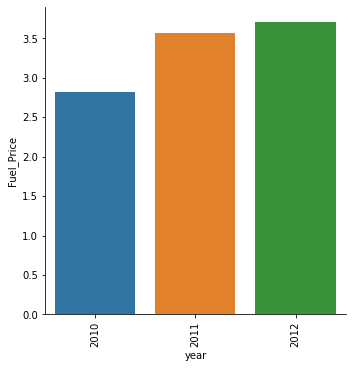

<Figure size 1440x360 with 0 Axes>

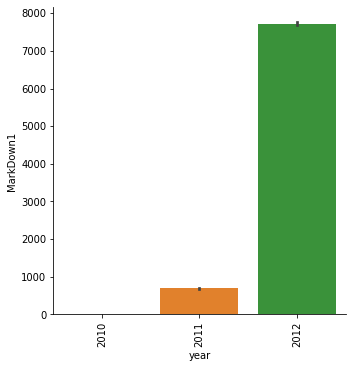

<Figure size 1440x360 with 0 Axes>

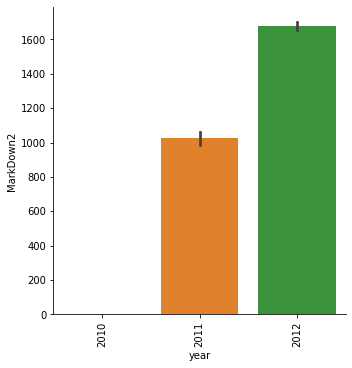

<Figure size 1440x360 with 0 Axes>

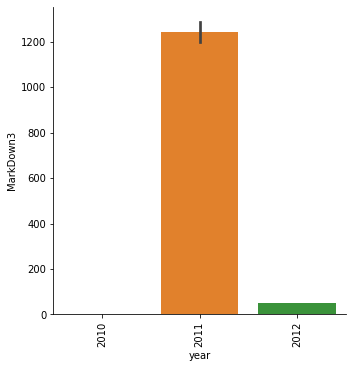

<Figure size 1440x360 with 0 Axes>

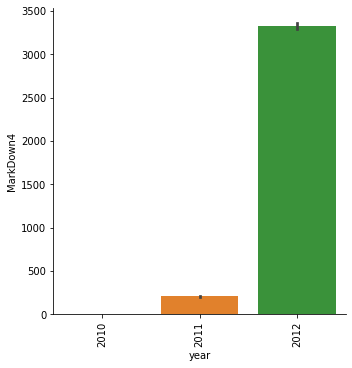

<Figure size 1440x360 with 0 Axes>

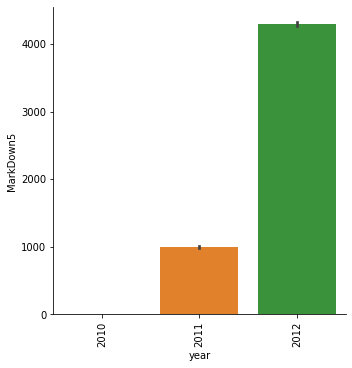

<Figure size 1440x360 with 0 Axes>

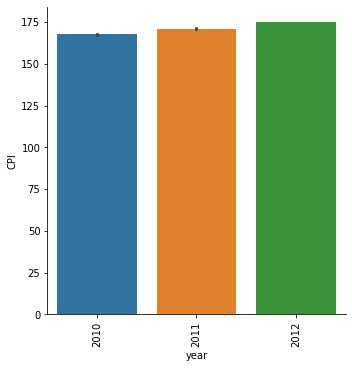

<Figure size 1440x360 with 0 Axes>

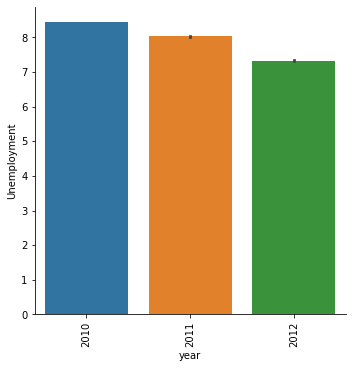

<Figure size 1440x360 with 0 Axes>

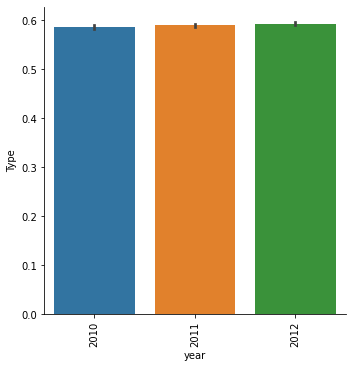

<Figure size 1440x360 with 0 Axes>

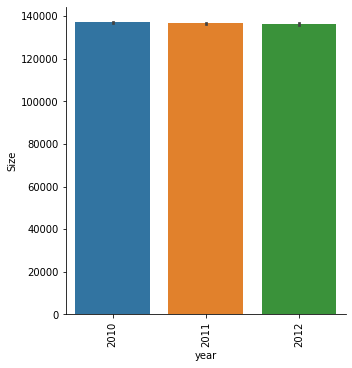

<Figure size 1440x360 with 0 Axes>

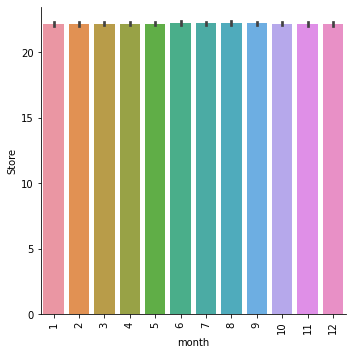

<Figure size 1440x360 with 0 Axes>

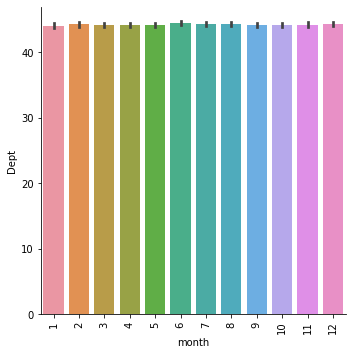

<Figure size 1440x360 with 0 Axes>

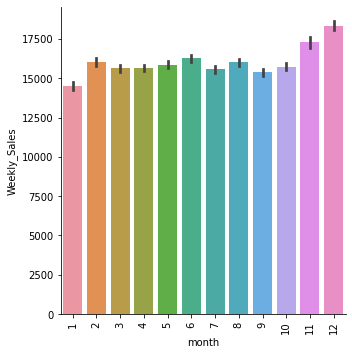

<Figure size 1440x360 with 0 Axes>

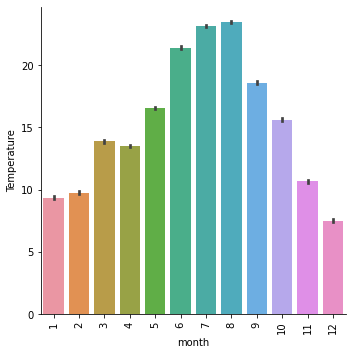

<Figure size 1440x360 with 0 Axes>

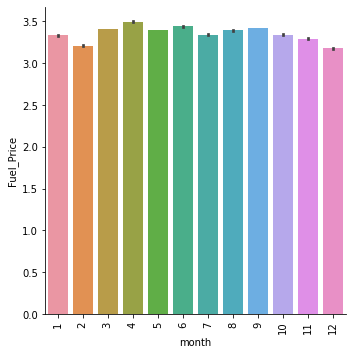

<Figure size 1440x360 with 0 Axes>

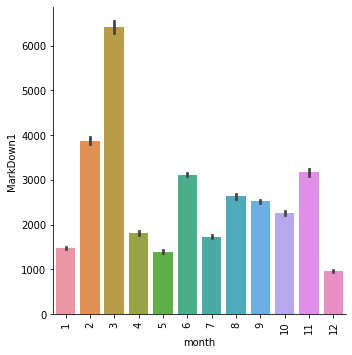

<Figure size 1440x360 with 0 Axes>

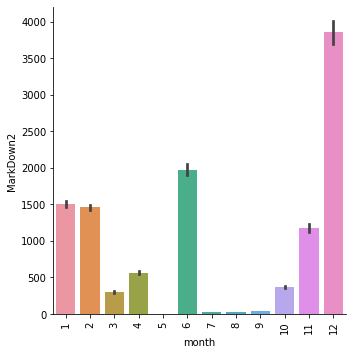

<Figure size 1440x360 with 0 Axes>

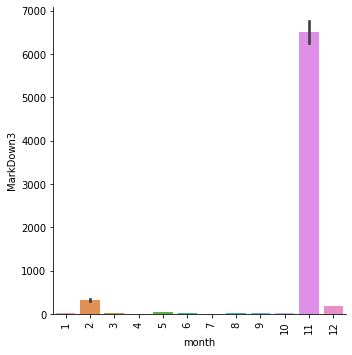

<Figure size 1440x360 with 0 Axes>

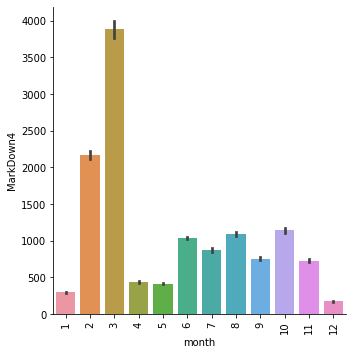

<Figure size 1440x360 with 0 Axes>

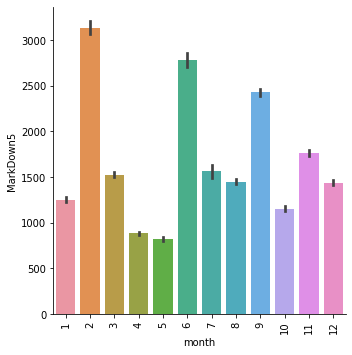

<Figure size 1440x360 with 0 Axes>

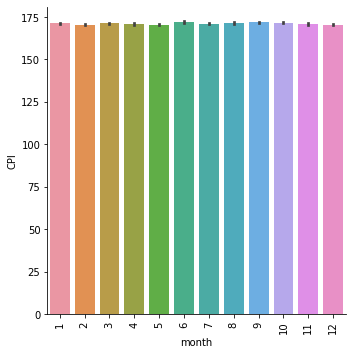

<Figure size 1440x360 with 0 Axes>

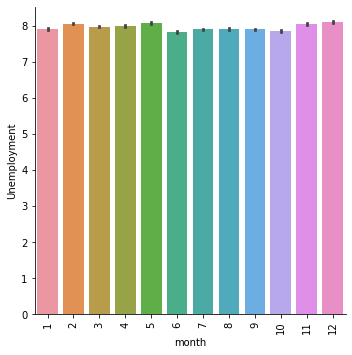

<Figure size 1440x360 with 0 Axes>

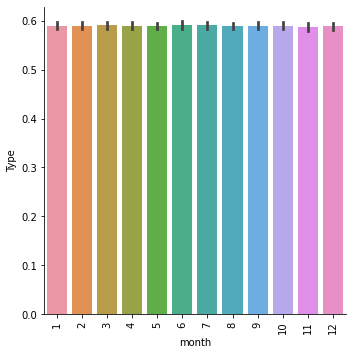

<Figure size 1440x360 with 0 Axes>

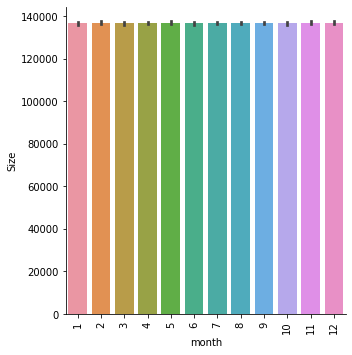

<Figure size 1440x360 with 0 Axes>

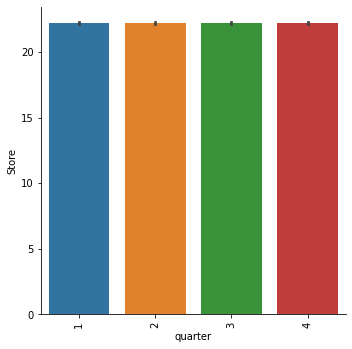

<Figure size 1440x360 with 0 Axes>

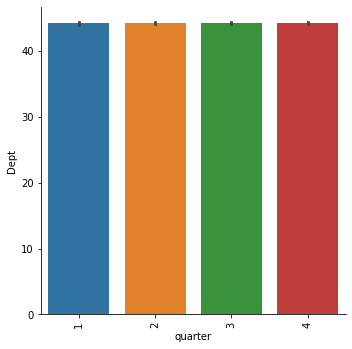

<Figure size 1440x360 with 0 Axes>

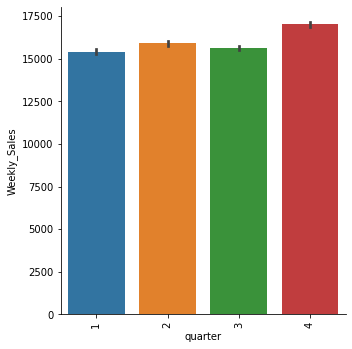

<Figure size 1440x360 with 0 Axes>

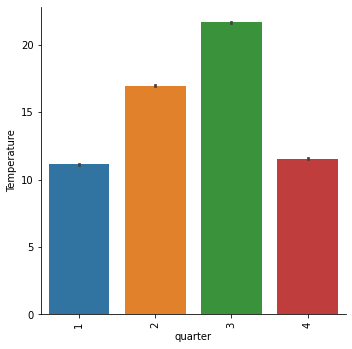

<Figure size 1440x360 with 0 Axes>

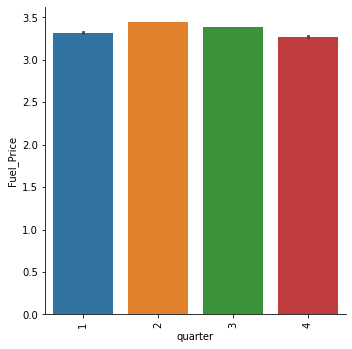

<Figure size 1440x360 with 0 Axes>

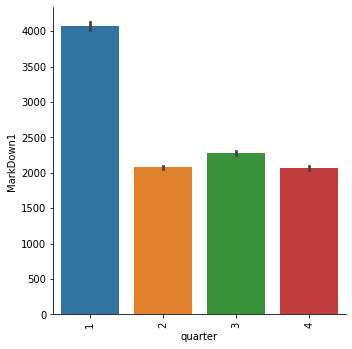

<Figure size 1440x360 with 0 Axes>

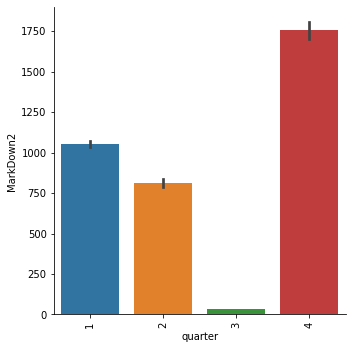

<Figure size 1440x360 with 0 Axes>

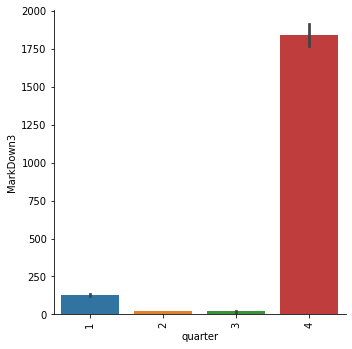

<Figure size 1440x360 with 0 Axes>

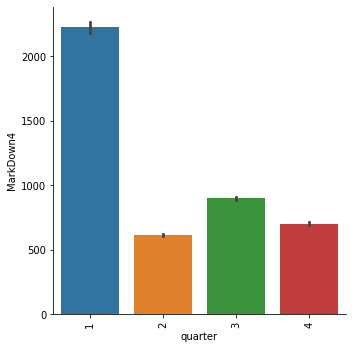

<Figure size 1440x360 with 0 Axes>

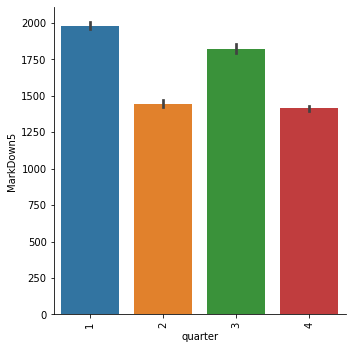

<Figure size 1440x360 with 0 Axes>

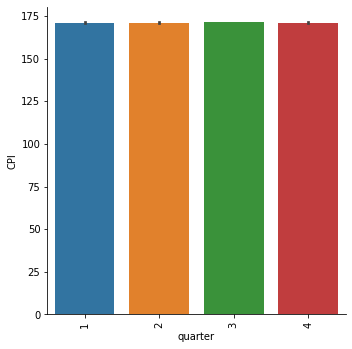

<Figure size 1440x360 with 0 Axes>

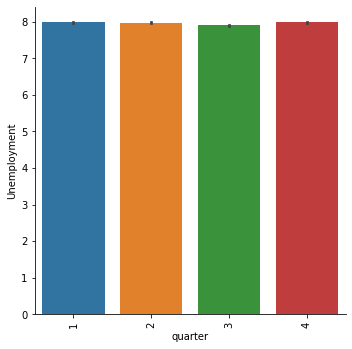

<Figure size 1440x360 with 0 Axes>

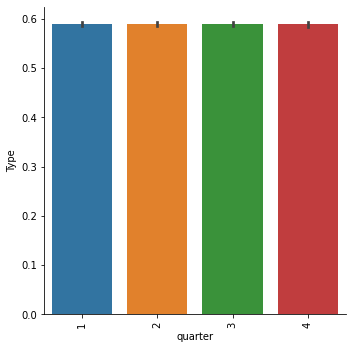

<Figure size 1440x360 with 0 Axes>

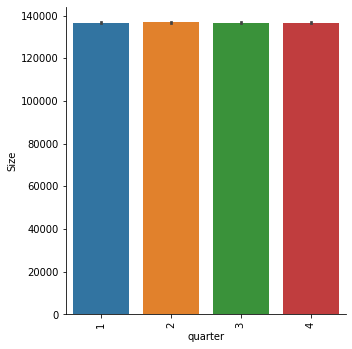

In [137]:
plot_bivariate (categorical_features, numeric_features, df, 'bar')

In [138]:
df.Date.unique()

array(['2010-05-02T00:00:00.000000000', '2010-12-02T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-05-03T00:00:00.000000000', '2010-12-03T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-02-04T00:00:00.000000000', '2010-09-04T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-07-05T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-09-07T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-06-08T00:00:00.000000000', '2010-08-13

In [139]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,quarter
column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,category,category,category
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Get some graphical insight**

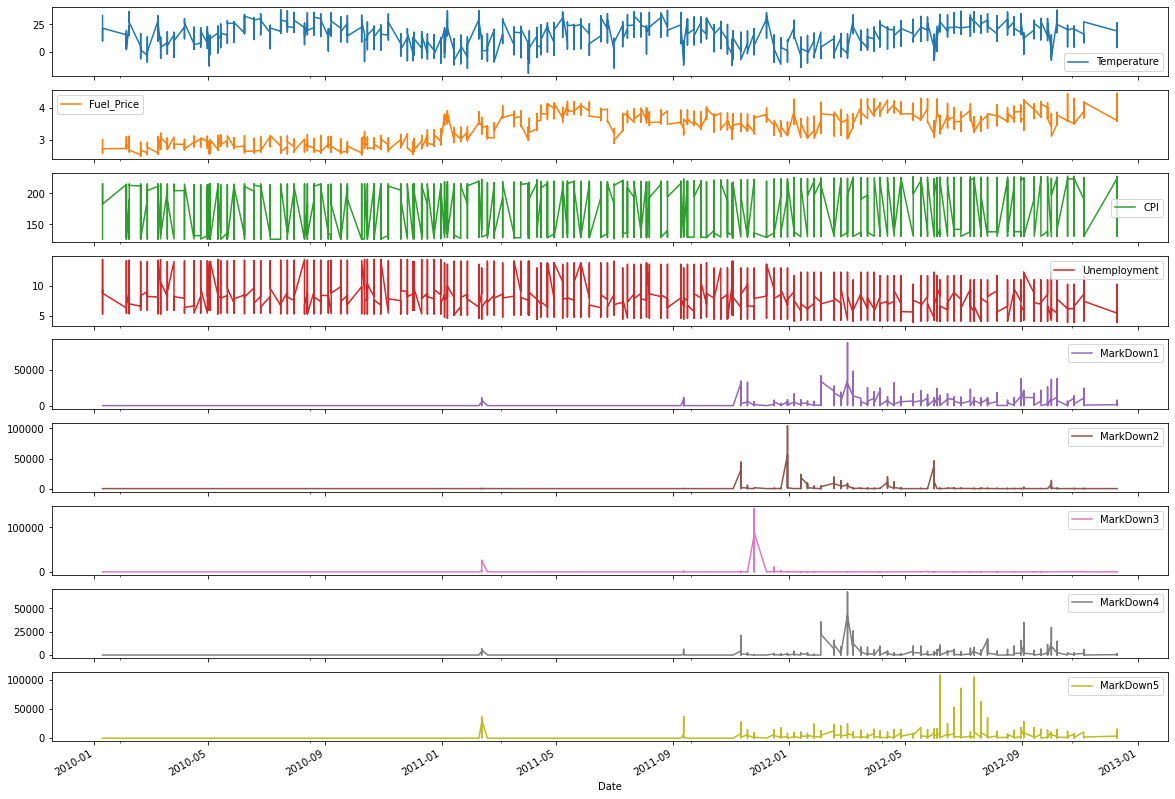

In [140]:
#Plot some of the variable present in the data frame such as temperature, fuel price, CPI, unemployment rate, ...
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

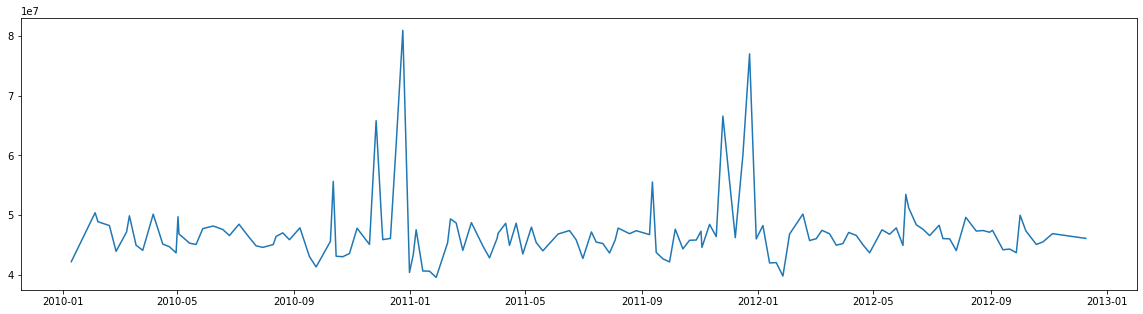

In [141]:
#Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [142]:
# The more remunerative weeks
df_average_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [143]:
# The least remunerative weeks
df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


# Forecast of the total sales volume

In [145]:
ts = df_average_sales_week.set_index('Date')

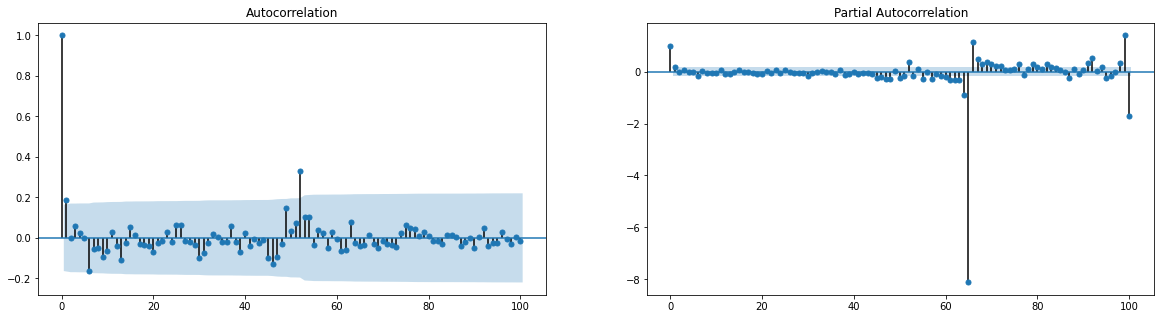

In [146]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()